# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Descriptive-stats-&amp;-analysis-of-assessment-scores" data-toc-modified-id="Descriptive-stats-&amp;-analysis-of-assessment-scores-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Descriptive stats &amp; analysis of assessment scores</a></div><div class="lev1 toc-item"><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></div><div class="lev1 toc-item"><a href="#Descriptive-statistics" data-toc-modified-id="Descriptive-statistics-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Descriptive statistics</a></div><div class="lev2 toc-item"><a href="#Percent-usage" data-toc-modified-id="Percent-usage-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Percent usage</a></div><div class="lev2 toc-item"><a href="#Sample-sizes" data-toc-modified-id="Sample-sizes-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Sample sizes</a></div><div class="lev2 toc-item"><a href="#Histogram-of-overall-scores" data-toc-modified-id="Histogram-of-overall-scores-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Histogram of overall scores</a></div><div class="lev1 toc-item"><a href="#Differences-in-assessment-scores" data-toc-modified-id="Differences-in-assessment-scores-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Differences in assessment scores</a></div><div class="lev2 toc-item"><a href="#By-gender" data-toc-modified-id="By-gender-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>By gender</a></div><div class="lev2 toc-item"><a href="#By-condition" data-toc-modified-id="By-condition-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>By condition</a></div><div class="lev2 toc-item"><a href="#By-morning-/-night-person" data-toc-modified-id="By-morning-/-night-person-43"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>By morning / night person</a></div>

# Descriptive stats & analysis of assessment scores

All of the analyses presented here are done without the excluded subjects.

# Setup

In [1]:
%matplotlib inline

from __future__ import division, print_function

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import utils

sns.set_context('notebook', font_scale=1.5)

df_roster = utils.load_roster()
df_hr = utils.load_heart_rate_data()

/Users/jakubkaczmarzyk/anaconda/envs/fitbit/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Descriptive statistics

## Percent usage

    number of non-nan heart rate samples / total number of samples

FITBIT USAGE
Mean: 89.385 %
Median: 90.519 %


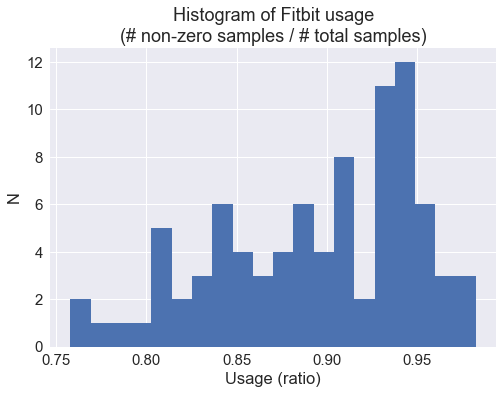

In [2]:
def get_percent_usage(subj_data):
    non_nan = len(subj_data[~subj_data.isnull()])
    total = len(subj_data)
    return non_nan / total

percent_usage = df_hr.groupby('subjectID').bpm.apply(get_percent_usage)

print("FITBIT USAGE\n"
      "Mean: {:.3f} %\n"
      "Median: {:.3f} %"
      "".format(percent_usage.mean()*100, percent_usage.median()*100))

percent_usage.hist(bins=20)
plt.title("Histogram of Fitbit usage\n(# non-zero samples / # total samples)")
plt.xlabel("Usage (ratio)")
plt.ylabel("N")
plt.show()

## Sample sizes

In [3]:
cols = ['group', 'Gender', 'year', 'Age', 'Ethnicity']
message = "Total N = {}".format(len(df_roster))
for c in cols:
    vals = pd.value_counts(df_roster[c])
    message += "\n\n{}\n{}".format(c.upper(), vals)
print(message)

Total N = 87

GROUP
1    65
2    22
Name: group, dtype: int64

GENDER
Female    45
Male      42
Name: Gender, dtype: int64

YEAR
1    84
4     2
3     1
Name: year, dtype: int64

AGE
18.0    68
19.0     8
17.0     7
23.0     1
21.0     1
22.0     1
20.0     1
Name: Age, dtype: int64

ETHNICITY
White Non-Hispanic/Latino                                      27
Asian                                                          25
White Hispanic/Latino                                          20
Black/African American                                          5
White Non-Hispanic/Latino, Asian                                4
White Non-Hispanic/Latino, Native Hawaiian/Pacific Islander     1
White Non-Hispanic/Latino, White Hispanic/Latino                1
Puerto Rican                                                    1
Hispanic/Latino                                                 1
White Hispanic/Latino, Asian                                    1
Middle Eastern                               

## Histogram of overall scores

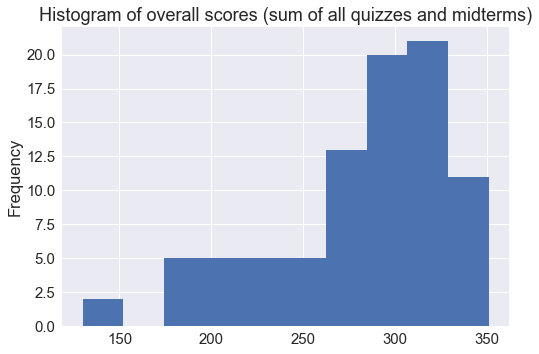

In [4]:
# Maximum possible score is 380.
# 8 quizzes at 10 points each plus 3 midterms at 100 points each.

df_roster['overall_score'].plot.hist()
plt.title("Histogram of overall scores (sum of all quizzes and midterms)")
plt.show()

# Differences in assessment scores

Using two-sample independent T-test.

In [5]:
def print_ind_ttest(df, column, group_a, group_b, y_col):
    """Print results of two-sample ind. t-test between two groups on y_col."""
    from scipy.stats import ttest_ind

    series_a = df.loc[df[column]==group_a, y_col]
    series_b = df.loc[df[column]==group_b, y_col]
    t_test = ttest_ind(series_a, series_b, nan_policy='omit')

    asterisk = " *" if t_test.pvalue < 0.05 else ""
    out = "{}{}\n".format(y_col.upper(), asterisk)
    out += ("p = {:.3f}, T = {:.2f}".format(t_test.pvalue, t_test.statistic))
    out += ("\n\t{}\t{}\nN\t{}\t{}\nMean\t{:.2f}\t{:.2f}"
            "".format(group_a, group_b, len(series_a), len(series_b),
                      series_a.mean(), series_b.mean()))
    print(out)

## By gender

In [6]:
print("T-tests comparing assessment scores by gender\n")
for assessment, _ in utils.assessment_dates:
    print_ind_ttest(df_roster, "Gender", "Female", "Male", assessment)
    print()

T-tests comparing assessment scores by gender

QUIZ_1
p = 0.779, T = -0.28
	Female	Male
N	45	42
Mean	9.27	9.34

QUIZ_2
p = 0.130, T = 1.53
	Female	Male
N	45	42
Mean	8.36	7.71

QUIZ_3 *
p = 0.031, T = 2.19
	Female	Male
N	45	42
Mean	7.83	6.90

MIDTERM_1
p = 0.132, T = 1.52
	Female	Male
N	45	42
Mean	75.39	70.76

QUIZ_4
p = 0.808, T = 0.24
	Female	Male
N	45	42
Mean	7.99	7.88

QUIZ_5
p = 0.145, T = 1.47
	Female	Male
N	45	42
Mean	8.81	8.45

QUIZ_6 *
p = 0.019, T = 2.39
	Female	Male
N	45	42
Mean	7.44	6.42

MIDTERM_2
p = 0.062, T = 1.89
	Female	Male
N	45	42
Mean	79.87	75.51

QUIZ_7
p = 0.263, T = 1.13
	Female	Male
N	45	42
Mean	8.20	7.62

QUIZ_8
p = 0.947, T = 0.07
	Female	Male
N	45	42
Mean	7.33	7.29

MIDTERM_3
p = 0.165, T = 1.40
	Female	Male
N	45	42
Mean	76.95	72.04



## By condition

In [7]:
print("T-tests comparing assessment scores by condition\n")
for assessment, _ in utils.assessment_dates:
    print_ind_ttest(df_roster, "group", 1, 2, assessment)
    print()

T-tests comparing assessment scores by condition

QUIZ_1
p = 0.150, T = 1.45
	1	2
N	65	22
Mean	9.41	9.00

QUIZ_2
p = 0.292, T = -1.06
	1	2
N	65	22
Mean	7.91	8.43

QUIZ_3
p = 0.721, T = -0.36
	1	2
N	65	22
Mean	7.34	7.52

MIDTERM_1
p = 0.089, T = -1.72
	1	2
N	65	22
Mean	71.64	77.64

QUIZ_4
p = 0.140, T = -1.49
	1	2
N	65	22
Mean	7.76	8.48

QUIZ_5
p = 0.635, T = -0.48
	1	2
N	65	22
Mean	8.60	8.74

QUIZ_6
p = 0.468, T = 0.73
	1	2
N	65	22
Mean	7.05	6.67

MIDTERM_2
p = 0.687, T = -0.40
	1	2
N	65	22
Mean	77.55	78.64

QUIZ_7
p = 0.124, T = -1.56
	1	2
N	65	22
Mean	7.70	8.59

QUIZ_8 *
p = 0.037, T = 2.12
	1	2
N	65	22
Mean	7.66	6.33

MIDTERM_3
p = 0.119, T = -1.58
	1	2
N	65	22
Mean	73.02	79.38



## By morning / night person

In [8]:
print("T-tests comparing assessment scores by morning/night person\n")
col = 'Are_you_a_morning_or_night_person___when_do_you_feel_most_productive__'
for assessment, _ in utils.assessment_dates:
    print_ind_ttest(df_roster, col, 'Night person', 'Morning person',
                          assessment)
    print()

T-tests comparing assessment scores by morning/night person

QUIZ_1
p = 0.849, T = 0.19
	Night person	Morning person
N	40	15
Mean	9.36	9.30

QUIZ_2
p = 0.171, T = -1.39
	Night person	Morning person
N	40	15
Mean	8.26	8.97

QUIZ_3
p = 0.441, T = -0.78
	Night person	Morning person
N	40	15
Mean	7.35	7.83

MIDTERM_1
p = 0.292, T = -1.06
	Night person	Morning person
N	40	15
Mean	72.08	76.57

QUIZ_4
p = 0.204, T = -1.29
	Night person	Morning person
N	40	15
Mean	7.86	8.57

QUIZ_5
p = 0.060, T = -1.92
	Night person	Morning person
N	40	15
Mean	8.46	9.13

QUIZ_6
p = 0.751, T = 0.32
	Night person	Morning person
N	40	15
Mean	7.03	6.82

MIDTERM_2
p = 0.340, T = -0.96
	Night person	Morning person
N	40	15
Mean	78.28	81.23

QUIZ_7
p = 0.185, T = -1.34
	Night person	Morning person
N	40	15
Mean	7.64	8.53

QUIZ_8
p = 0.677, T = -0.42
	Night person	Morning person
N	40	15
Mean	7.06	7.43

MIDTERM_3 *
p = 0.027, T = -2.28
	Night person	Morning person
N	40	15
Mean	74.74	83.37

